### loading dataset

In [1]:
import pandas as pd

train = pd.read_csv("C:\\Users\\faisa\\Downloads\\Jupyter Notebook\\Small projects\\Titanic data\\train.csv")
test = pd.read_csv("C:\\Users\\faisa\\Downloads\\Jupyter Notebook\\Small projects\\Titanic data\\test.csv")

### exploratory data analysis (EDA)

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# survived = 1, lived 0, died
# sibsp = siblings/ spouse chilo kina
# parch = parents/ children chilo kina
# embarked = where did they start journey... C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
#lets check our dataset row, column

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [5]:
train.info() # we can see some datas are missing from (Age, Cabin, Embarked) column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
test.info() # missing (Age, Cabin, Fare)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# lets check how much data is missing

train.isnull().sum() #coloumn e jotogula value null, shegula sum korsi

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Data Visualization

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [10]:
# will check all our categorical features:
#    Pclass
#    Sex
#    SibSp
#    Parch
#    Embarked
#    Cabin   eta check korbo na...ship e onk cabin chilo...output e kichu bujha jay na

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind = 'bar', stacked=False, figsize=(10,5)) # stack er cheye evabe rakhle beshi clear mone hoy

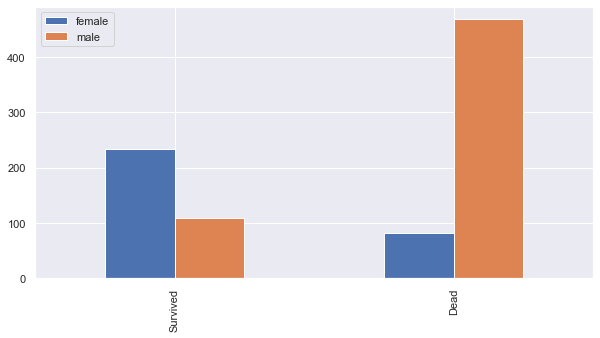

In [12]:
bar_chart('Sex')

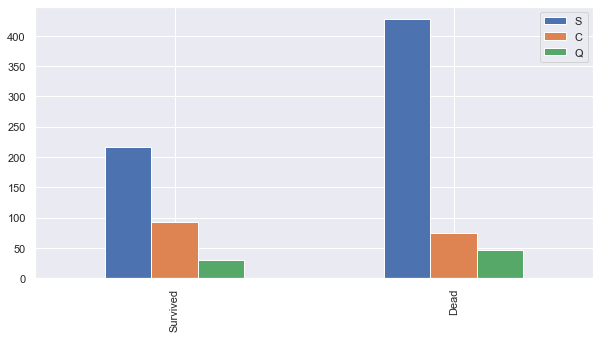

In [13]:
bar_chart('Embarked')

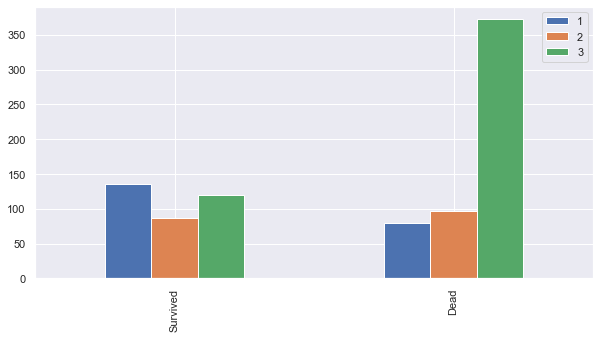

In [14]:
bar_chart('Pclass')

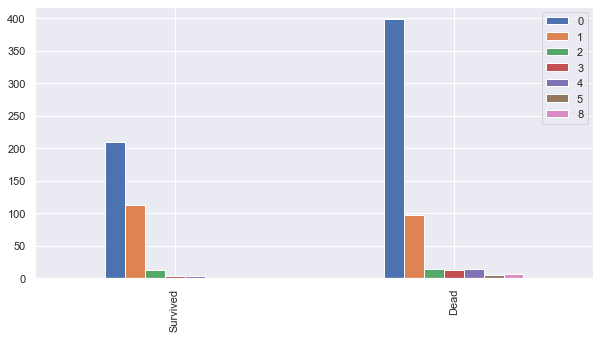

In [15]:
bar_chart('SibSp')

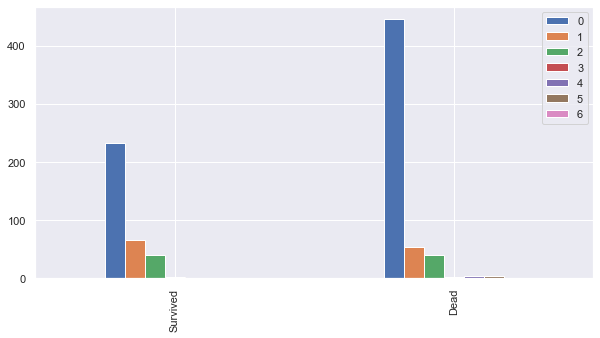

In [16]:
bar_chart('Parch')

In [17]:
# bar_chart('Cabin') , output kichu bujha jay na

### Feature Engineering

#### Title

In [18]:
# প্রথমেই যোগ করে নেই টেস্ট আর ট্রেনিং ডাটাসেট। 'Title' column add kortesi dataset e...

train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [19]:
train.Title.value_counts() # same as 'train['Title'].value_counts()'

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Col           2
Mlle          2
Countess      1
Capt          1
Sir           1
Don           1
Jonkheer      1
Mme           1
Ms            1
Lady          1
Name: Title, dtype: int64

In [20]:
test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [21]:
# just checking our new column "Title"

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


#### টাইটেলগুলোকে ম্যাপ করি সংখ্যার সাথে
আগের মতো বাকি অদরকারি টাইটেলগুলোকে ম্যাপ করে দেই ৩ এর সাথে।

Mr : 0
Miss : 1
Mrs: 2
Master: 3
Others: 4

In [22]:
# dictionary er vitore raktesi {"key":'value'}

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3,
                 "Dr": 4, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                 "Ms": 4, "Lady": 4, "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4,"Sir": 4 }

for dataset in train_test_data:
    dataset.Title = dataset.Title.map(title_mapping)

In [23]:
train.head() # Title at the end

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


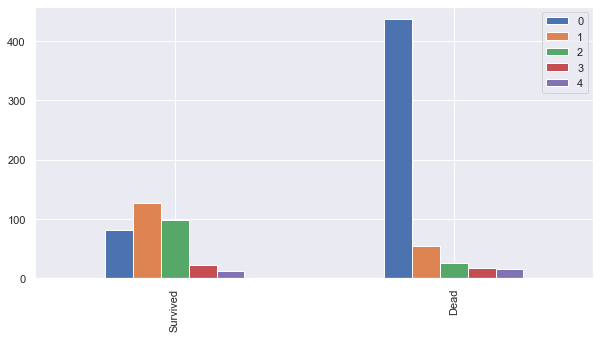

In [25]:
# lets look at our bar chart of Title

bar_chart('Title')

In [26]:
# we can drop 'name' from our dataset

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True) # axis value 1 means column

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


##### মহিলা পুরুষকে ম্যাপিং করি সংখ্যায়
male: 0 female: 1

#### Sex

In [29]:
sex_mapping = {"male": 0, "female": 1} # OBOSSHOI OBOSSHOI mapping er vitore double quotation("") use korte hobe....ami single quote use koray error ashtesilo

for dataset in train_test_data:
    dataset.Sex = dataset.Sex.map(sex_mapping)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


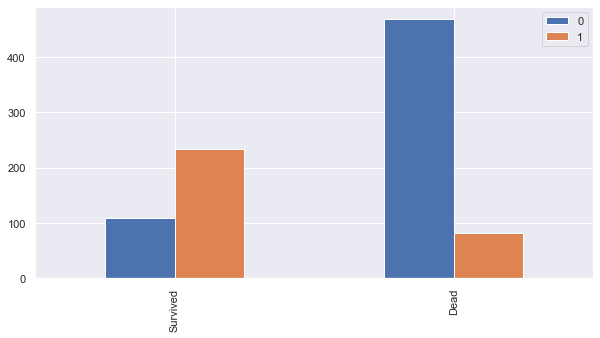

In [31]:
bar_chart('Sex')

#### Age

In [32]:
# fill missing age with "median age for each title" (Mr, Mrs, Miss, Master, Others)

train.Age.fillna(train.groupby("Title").Age.transform("median"), inplace=True)
test.Age.fillna(test.groupby("Title").Age.transform("median"), inplace=True)

In [33]:
# e line ta likha ase, but meanining bujhlam na

# train.groupby("Title").Age.transform("median")
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [34]:
train.isnull().sum() # we can see we dont have any missing value in Age anymore

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

### plotting different Age level to get info

#### আমরা অনেকগুলো চার্ট আঁকবো কারণ আমাদের বয়স কিন্তু একটা বড়ো ক্লাসিফায়ার। প্রথমে কোন লিমিট রাখবো না - মানে শুরু থেকে শেষ পর্যন্ত - facet.set(xlim=(0, train['Age'].max()))

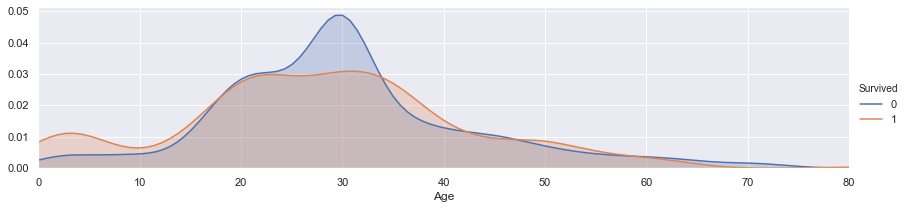

In [35]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

মারা যাওয়া মানুষগুলোর বয়স ১৬ থেকে ৩৪ এর মধ্যে বেশি দেখা যাচ্ছে আমাদের ছবিতে। তার আগের অথবা পরের বয়সগুলোর মানুষ বেঁচে গিয়েছে বেশি। প্লটে দেখা যাচ্ছে ৩০ বছরের মানুষগুলো মারা গিয়েছে বেশি। 

#### আমাদের প্লটের বয়সসীমা কমিয়ে নিয়ে আসি ০ থেকে ২০ এর মধ্যে plt.xlim(0, 20) দিয়ে। এরপর ২০ থেকে ৩০, ৪০, ৫০, ৬০ পর্যন্ত।

(0.0, 20.0)

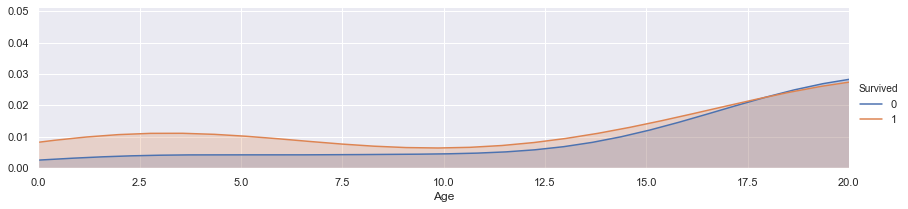

In [36]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(0, 20)

(20.0, 30.0)

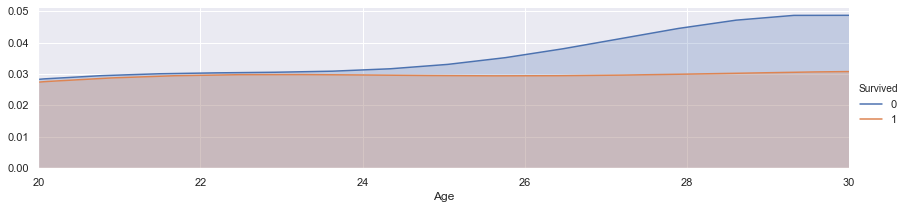

In [37]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(20, 30)

(30.0, 40.0)

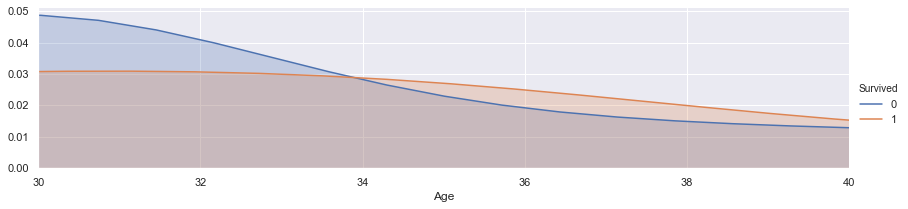

In [38]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(30, 40)

(40.0, 60.0)

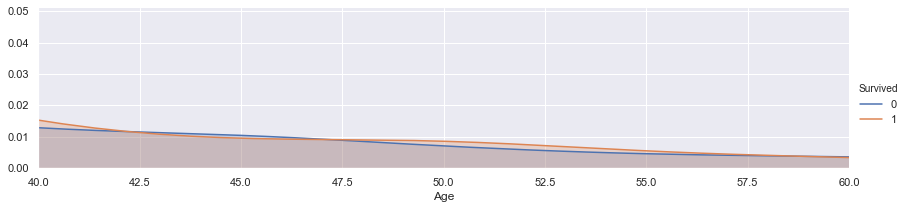

In [39]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
plt.xlim(40, 60)

### from the above Age graphs we can say (16-34) age groups died more(blue line)

## বয়সকে ভিন্ন ভিন্ন ব্যাগে ফেলা

বয়সের মতো কন্টিনিউয়াস ভ্যারিয়েবলকে পাল্টে ফেলছি ক্যাটেগরিক্যাল ভ্যারিয়েবলে।

এখানে আমাদের ফিচার ভেক্টর ম্যাপ হতে পারে এধরনের ৫টা ভাগে:

child: 0
young: 1
adult: 2
mid-age: 3
senior: 4

In [40]:
for dataset in train_test_data:
    dataset.loc[dataset.Age <= 16, 'Age'] = 0,
    dataset.loc[(dataset.Age > 16) & (dataset.Age <= 26), 'Age'] = 1,   # 'and' likhle error dey...btw python e '&&' use hoy na
    dataset.loc[(dataset.Age > 26) & (dataset.Age <= 36), 'Age'] = 2,
    dataset.loc[(dataset.Age > 36) & (dataset.Age <= 62), 'Age'] = 3,
    dataset.loc[(dataset.Age > 62), 'Age'] = 4

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


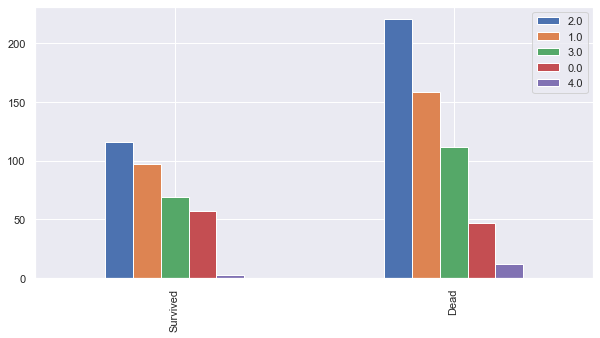

In [42]:
bar_chart('Age')

### filling missing value of Embarked column

#### but first lets look at which passenger class people embarked from where

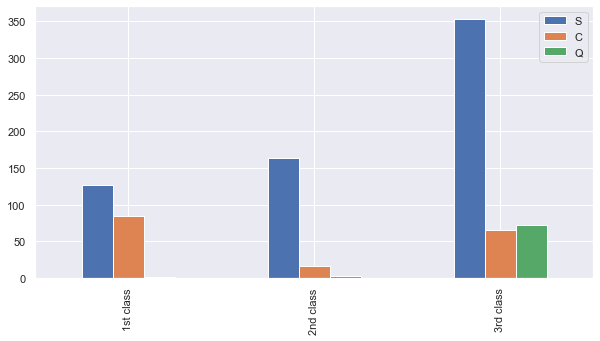

In [43]:
Pclass1 = train[train.Pclass==1].Embarked.value_counts()
Pclass2 = train[train.Pclass==2].Embarked.value_counts()
Pclass3 = train[train.Pclass==3].Embarked.value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class', '2nd class', '3rd class']
df.plot(kind = 'bar', stacked = False, figsize = (10,5))

In [44]:
# embarked e j 2ta missing data ache, oigula S diye fillup korbo since S theke beshi passenger ashche

for dataset in train_test_data:
    dataset.Embarked = dataset.Embarked.fillna('S')

In [45]:
# location k number diye map kori

embarked_mapping = {"S": 0, "C": 1, "Q": 2}

for dataset in train_test_data:
    dataset.Embarked = dataset.Embarked.map(embarked_mapping)

In [46]:
# fill missing Fare with median fare for each Pclass

train.Fare.fillna(train.groupby("Pclass").Fare.transform("median"), inplace=True)
test.Fare.fillna(test.groupby("Pclass").Fare.transform("median"), inplace=True)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


### lets plot Fare to see which passengers died most

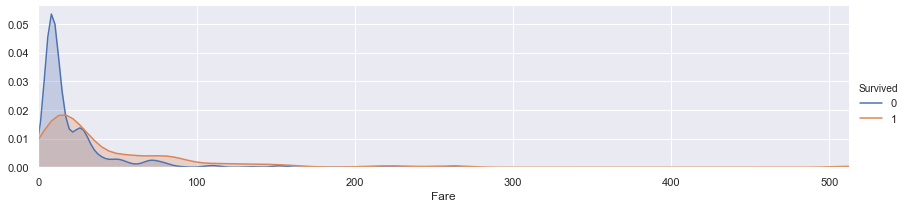

In [47]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show() 

প্লট থেকে দেখা যাচ্ছে ০ থেকে ১০০ ঘরের মধ্যে বেশিরভাগ মানুষ মারা গেছেন। মানে যারা টিকেট কেঁটেছিলেন ০ থেকে ১০০ ডলারের মধ্যে - তাদের ভাগ্য খারাপ।

(0.0, 20.0)

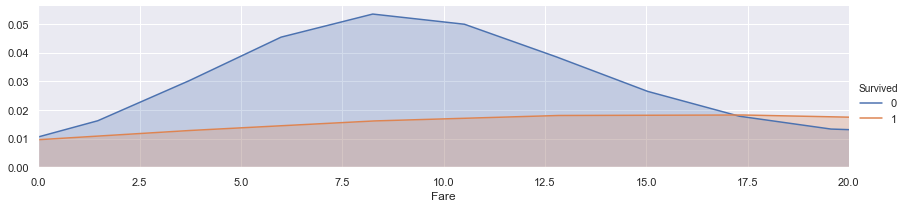

In [48]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

এই ছবিতে (০-২০) ব্যাপারটা আরো পরিষ্কারভাবে ধরা পড়েছে। বোঝা যাচ্ছে ৮ ডলার আর তার আশেপাশের টাকা দিয়ে কেনা টিকেটের মালিকদের ভাগ্য সুপ্রসন্ন ছিলো না।

(0.0, 30.0)

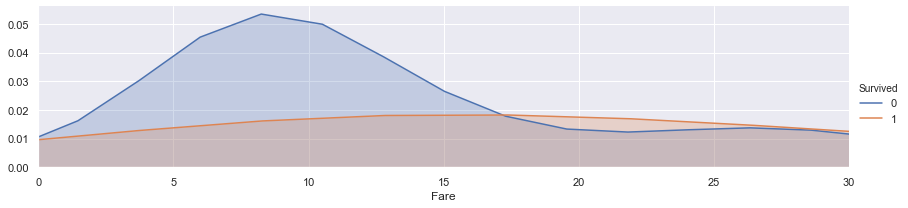

In [49]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 30)

In [50]:
# from above plots we can see people who spent less money on Fare died more...lets make sections on Fare 

for dataset in train_test_data:
    dataset.loc[dataset.Fare <= 17, 'Fare'] = 0,
    dataset.loc[(dataset.Fare > 17) & (dataset.Fare <= 30), 'Fare'] = 1,
    dataset.loc[(dataset.Fare > 30) & (dataset.Fare <= 100), 'Fare'] = 2,
    dataset.loc[dataset.Fare > 100, 'Fare'] = 3

In [51]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


### Cabin

In [52]:
# we'll onl need 1st letter from cabin column to determine which cabin belongs to which class

train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
D              3
              ..
A20            1
B19            1
E31            1
D10 D12        1
D45            1
Name: Cabin, Length: 147, dtype: int64

শুধুমাত্র দরকার প্রথম অক্ষর। str[:1], কারণ এখানে পাওয়া যাবে কোন ক্লাসের কেবিন সেটা। তাহলে একটা ধারণা পাওয়া যাবে জাহাজের কোন এলাকায় ছিলেন একজন যাত্রী।

In [53]:
for dataset in train_test_data:
    dataset.Cabin = dataset.Cabin.str[:1]

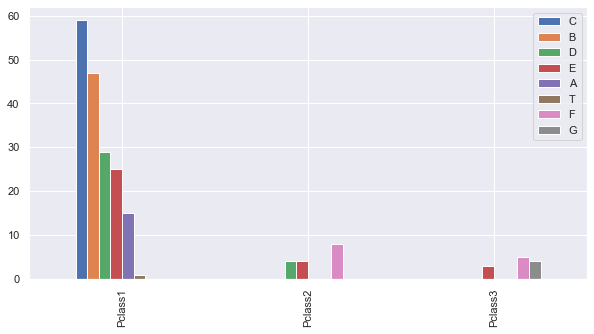

In [54]:
Pclass1 = train[train.Pclass==1].Cabin.value_counts()
Pclass2 = train[train.Pclass==2].Cabin.value_counts()
Pclass3 = train[train.Pclass==3].Cabin.value_counts()

df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['Pclass1', 'Pclass2', 'Pclass3']
df.plot(kind='bar', stacked=False, figsize=(10,5))

একটা জিনিস লক্ষ্য করেছেন? ১ম শ্রেণীতে A, B, এবং C আছে। কিন্তু বাকি ক্লাসে A,B, এবং C কিন্তু নেই। তাহলে একটা ম্যাপিং করি সমান স্কেলিং দিয়ে। একই দূরত্বে। 0.4 দিয়ে প্রতিটার দূরত্ব। কেবিন ধরে।

In [55]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}

for dataset in train_test_data:
    dataset.Cabin = dataset.Cabin.map(cabin_mapping)

In [56]:
# fill missing Cabins with median cabin for each Pclass

train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### Family member

In [57]:
# last er +1 hocche nijer jnno

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1  #ashole (.) na use korai valo...ekhane error diccchilo...[] er moddhe double quote"" use kore likhlei valo

(0.0, 11.0)

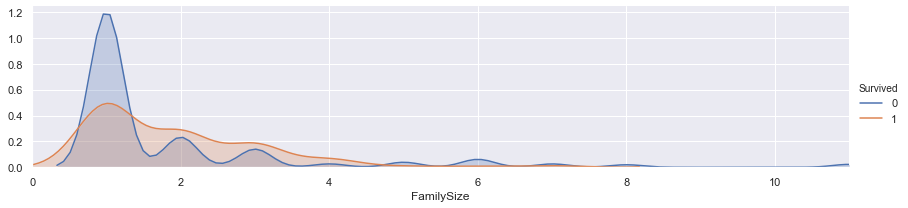

In [58]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

আবারো পরিবারের ম্যাপিং। ওপরের ছবি বলছে যারা একা ভ্রমণ করছিলেন তারা মারা গিয়েছেন বেশি। এখানে "০" মানে হচ্ছে উনি একা ছিলেন এই টাইটানিক জাহাজে।

In [59]:
# family size onujayi mapping kortesi...ekla hoile 0, 2jon hoile 0.4 evabe 0.4 kore bartese

family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [60]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [61]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,1,3.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,2,0,3.0,0,0,240276,0.0,2.0,2,0,0.0
3,895,3,0,2.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,3,1,1.0,1,1,3101298,0.0,2.0,0,2,0.8


In [62]:
# lets drop unnecessary columns since we already took important features from those

features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

train = train.drop(['PassengerId'], axis=1)

In [63]:
train_data = train.drop(['Survived'], axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [64]:
# lets see all our features as number

train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


### Machine Learning model

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import numpy as np

In [66]:
# lets check if we have any missing data

train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
Fare          0
Cabin         0
Embarked      0
Title         0
FamilySize    0
dtype: int64

In [67]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

### ক্রস ভ্যালিডেশন (কে-ফোল্ড = ১০ ভাগ)
আমরা চলে এসেছি প্রায় শেষের দিকে। শেষ করার আগে একটা জিনিস সবসময় চাইবো - বিশেষ করে নিজের মডেলের 'স্ট্যাবিলিটি' যাতে ভালো থাকে। এখন আমরা কাজ করছি ট্রেনিং ডাটা দিয়ে, কিন্তু যদি অন্য নতুন ডাটা (যেটা মডেল দেখেনি) দিয়ে মডেলটা খারাপ করে? মানে যে ডাটা সে দেখেনি - ট্রেনিং সেশনে। আর সেকারণে আমরা ডাটাকে দশভাগে ভাগ করে একেক সময় একেক ভাগকে দেখাবো না (মানে, লুকিয়ে রাখবো) মডেলকে। নিজের ডাটার মধ্যে চেক করা, এটা একটা মজার জিনিস। নিজের ডাটাকে ঘুরিয়ে ফিরিয়ে মডেলের ভেতরের 'অ্যাক্যুরেসি' দেখার জন্য এটা একটা চমৎকার জিনিস। চলুন, আগে বের করি cross_val_score, এটা টেস্ট 'ফোল্ডে'র স্কোরটা বের করে আনে। cross_val_score কিন্তু ট্রেনিং এবং টেস্ট দুটোতেই প্রতিটা 'ফোল্ড' ব্যবহার করে।

'n_splits=10' মানে এখানে ডাটাসেটকে ১০ ভাগে ভাগ করা হয়েছে।

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

K_Fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [69]:
# Decision Tree

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = K_Fold, n_jobs = 1, scoring = scoring)
print(score) # 10 ta value hocche 10 ta cross validate er score...finally mean kore main result

[0.76666667 0.82022472 0.78651685 0.7752809  0.87640449 0.76404494
 0.82022472 0.80898876 0.73033708 0.79775281]


In [70]:
round(np.mean(score)*100, 2) # 2 hocche doshomik er por 2 ghor

79.46

--------------------

In [71]:
# Random forest

clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv = K_Fold, n_jobs=1, scoring = scoring)
print(score)

[0.77777778 0.86516854 0.83146067 0.75280899 0.85393258 0.82022472
 0.82022472 0.80898876 0.76404494 0.80898876]


In [72]:
round(np.mean(score)*100, 2)

81.04

### uploading Kaggle

In [73]:
# need to create submission.csv

clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [74]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": prediction
})
submission.to_csv('submission.csv', index=False)

### সাবমিশন ফাইল তৈরি করে ভেতরে দেখা

In [75]:
submission = pd.read_csv('submission.csv')

submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
